# DATA EXPLORATION, CLEANING AND IMPUTATION

### Loading libraries

In [1]:
#!pip install -r requirements.txt
#import nltk
#nltk.download('stopwords')

In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.10f}'.format

### MISSING VALUE VISUALIZATION
import missingno as msno

### DATA PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

### DATA PREPROCESSING
from functions import *

#### WORDCLOUD
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

#### Loading data
First and second column are unique ID's so we keep only the smallest one to save memory space

In [3]:
!pwd

/notebooks


In [4]:
train = pd.read_csv('../datasets/henry_lab_disk/properties_colombia_train.csv', sep = ',')
train.drop('id', axis=1, inplace=True)
train.rename(columns={'Unnamed: 0':'id'}, inplace=True)
train.set_index('id', inplace=True)

In [5]:
train.shape

(197549, 25)

Create or target variable before make any preprocessing, as requested by Henry Mentors

In [6]:
train['target'] = np.where(train['price'] > train['price'].mean(), 1, 0)
train['target'].value_counts()

0    151191
1     46358
Name: target, dtype: int64

#### First sight of tabular data

In [7]:
train.iloc[:,0:10].sample(10)

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4
id,,,,,,,,,,
496726,Propiedad,2020-07-31,2020-08-01,2020-07-31,3.4450000000,-76.5490000000,Colombia,Valle del Cauca,Cali,NaN
267033,Propiedad,2020-08-02,2020-08-03,2020-08-02,4.8213812900,-75.6732439100,Colombia,Risaralda,Pereira,NaN
835265,Propiedad,2020-11-04,2020-11-05,2020-11-04,NaN,NaN,Colombia,Antioquia,Medellín,NaN
932518,Propiedad,2020-08-27,2020-08-30,2020-08-27,5.0508257600,-75.5665397600,Colombia,Caldas,Manizales,NaN
416821,Propiedad,2020-08-11,2020-11-24,2020-08-11,6.1793762405,-75.5774184939,Colombia,Antioquia,Envigado,NaN
149851,Propiedad,2020-12-23,2021-01-15,2020-12-23,4.1148961300,-73.6259739500,Colombia,Meta,Villavicencio,NaN
292244,Propiedad,2020-09-23,2020-11-30,2020-09-23,6.1931935000,-75.5619932000,Colombia,Antioquia,Medellín,El Poblado
924677,Propiedad,2020-09-06,2020-09-07,2020-09-06,NaN,NaN,Colombia,Antioquia,Medellín,NaN
649191,Propiedad,2020-11-19,2021-05-05,2020-11-19,4.7330000000,-74.2630000000,Colombia,Cundinamarca,Funza,NaN


In [8]:
train.iloc[:,10:20].sample(10)

,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period
id,,,,,,,,,,
213856,NaN,NaN,NaN,NaN,4.0000000000,NaN,NaN,950000000.0000000000,COP,Mensual
545983,NaN,NaN,3.0000000000,3.0000000000,4.0000000000,230.0000000000,230.0000000000,1300000000.0000000000,COP,NaN
182341,NaN,NaN,NaN,NaN,2.0000000000,NaN,NaN,385000000.0000000000,COP,Mensual
933409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3172400000.0000000000,COP,Mensual
989675,NaN,NaN,NaN,6.0000000000,6.0000000000,NaN,NaN,1100000000.0000000000,COP,NaN
234039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2350000000.0000000000,COP,NaN
4894,NaN,NaN,NaN,NaN,2.0000000000,NaN,NaN,128000000.0000000000,COP,Mensual
85830,NaN,NaN,NaN,NaN,4.0000000000,NaN,NaN,540000000.0000000000,COP,NaN
640434,NaN,NaN,NaN,NaN,9.0000000000,NaN,NaN,1200000000.0000000000,COP,NaN


In [9]:
train.iloc[:,20:].sample(10)

,title,description,property_type,operation_type,geometry,target
id,,,,,,
199762,Venta_Arriendo _ wasi1887599,"Dos alcobas , 3 baños, cocina americana, salón...",Apartamento,Venta,POINT (-74.82924482 11.00712693),0
965251,VENTA APTO EN LA FELICIDAD,GANGA HERMOSO APARTAMENTO CERCA A VIAS PRINCIP...,Apartamento,Venta,POINT (-74.1273301 4.6581851),0
447800,Oficina en Venta Ubicado en ITAGUI,Codigo Inmueble 239 Se arrienda oficina en May...,Otro,Venta,POINT EMPTY,0
555083,Apartamento En Venta En Bogota Chico Reservado...,Al ingresar a esta magnifica propiedad| encont...,Casa,Venta,POINT (-74.046 4.671),1
99079,Apartamento En Venta En Cali Santa Anita Cod. ...,"Se vende Apartamento remodelado, consta de 10...",Apartamento,Venta,POINT (-76.537 3.397),0
852763,Apartamento En Venta En Bogota Chico Norte Cod...,EXCLUSIVO APARTAMENTO EN VENTA CON HERMOSA VIS...,Apartamento,Venta,POINT (-74.041 4.677),1
968176,VENDO - PERMUTO CASA RESTREPO META,VENDE O PERMUTA CASA RESTREPO META POR PREDIO ...,Casa,Venta,POINT (-73.562567 4.263082),0
614194,L21 SE VENDE CASA LOTE PALESTINA BOSA,caasa lote de 6x15\ncosta de un apartamento de...,Casa,Venta,POINT EMPTY,0
860434,"APARTAMENTO EN VENTA, BOGOTA-CENTRO INTERNACIONAL","EXCELENTE APARTAMENTO, CON AMPLIOS ESPACIOS, L...",Apartamento,Venta,POINT (-74.0710219 4.6162586),0


In [10]:
train.iloc[:,0:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197549 entries, 861131 to 448114
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ad_type     197549 non-null  object 
 1   start_date  197549 non-null  object 
 2   end_date    197549 non-null  object 
 3   created_on  197549 non-null  object 
 4   lat         148051 non-null  float64
 5   lon         148051 non-null  float64
 6   l1          197549 non-null  object 
 7   l2          197549 non-null  object 
 8   l3          186517 non-null  object 
 9   l4          45367 non-null   object 
 10  l5          27409 non-null   object 
 11  l6          6867 non-null    object 
 12  rooms       27537 non-null   float64
dtypes: float64(3), object(10)
memory usage: 21.1+ MB


In [11]:
train.iloc[:,13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197549 entries, 861131 to 448114
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bedrooms         40525 non-null   float64
 1   bathrooms        156467 non-null  float64
 2   surface_total    6974 non-null    float64
 3   surface_covered  9802 non-null    float64
 4   price            197486 non-null  float64
 5   currency         197482 non-null  object 
 6   price_period     35971 non-null   object 
 7   title            197548 non-null  object 
 8   description      197428 non-null  object 
 9   property_type    197549 non-null  object 
 10  operation_type   197549 non-null  object 
 11  geometry         197549 non-null  object 
 12  target           197549 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 21.1+ MB


## DUPLICATED VALUES HANDLING

First we check for duplicated entries

In [12]:
train.duplicated().sum()

504

We drop these 504 values

In [13]:
train.drop_duplicates(inplace=True)

Now we should see if there are republished sale annoucements. 

In [14]:
train['description'].duplicated().sum()

85673

This is quite a lot republished annoucements. Will have to delete them

First we get the indexes in tuples of the duplicated values in description and have a quick sight

I just pick a random tuple of repetead indexes

In [15]:
df = train.loc[train['description'].duplicated(keep=False),'description']
df
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[9]


(133154, 255680, 133153)

In [16]:
train.loc[[133153,255680, 133154],['start_date','description','price']]


,start_date,description,price
id,,,
133153,2020-11-17,!! EN SUBASTA PRECIO BASE DE OFERTA| CASA COME...,369900000.0000000000
255680,2020-10-22,!! EN SUBASTA PRECIO BASE DE OFERTA| CASA COME...,369900000.0000000000
133154,2020-11-17,!! EN SUBASTA PRECIO BASE DE OFERTA| CASA COME...,369900000.0000000000


This confirm visually the republished data, so we delete repeated rows (85000!)

In [17]:
train.drop_duplicates(subset='description', inplace=True)

In [18]:
train.shape

(111372, 26)

## INITIAL DESCRIPTION

In [19]:
train.describe(exclude=[np.number])

,ad_type,start_date,end_date,created_on,l1,l2,l3,l4,l5,l6,currency,price_period,title,description,property_type,operation_type,geometry
count,111372,111372,111372,111372,111372,111372,102044,32358,18868,5378,111309,18769,111371,111371,111372,111372,111372
unique,1,145,446,145,1,31,292,58,20,146,2,1,89814,111371,8,1,61327
top,Propiedad,2020-08-27,9999-12-31,2020-08-27,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Chico Reservado,COP,Mensual,Apartamento en Venta Ubicado en MEDELLIN,<b>Hermosa Mansión En El Poblado. Área Constru...,Apartamento,Venta,POINT EMPTY
freq,111372,3464,11520,3464,111372,26967,20000,4944,4943,834,111301,18769,328,1,53677,111372,13214


In [20]:
train.describe(exclude=[object])

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,target
count,98158.0000000000,98158.0000000000,25417.0000000000,38145.0000000000,80587.0000000000,6541.0000000000,8984.0000000000,111313.0000000000,111372.0000000000
mean,5.6530966978,-75.0624604743,3.2977534721,3.2462708088,2.6863389877,1303.0710900474,1009.7141585040,685289587.7896202803,0.2504220091
std,2.1715072627,1.0747290157,1.7651119369,2.0016806332,1.4819314416,7790.6648640437,38968.9325705900,2295527196.8420238495,0.4332580200
min,-32.7873420000,-119.6981900000,1.0000000000,0.0000000000,1.0000000000,10.0000000000,1.0000000000,0.0000000000,0.0000000000
25%,4.5870000000,-75.6474760425,3.0000000000,3.0000000000,2.0000000000,72.0000000000,70.0000000000,200000000.0000000000,0.0000000000
50%,4.8605181000,-75.4808559000,3.0000000000,3.0000000000,2.0000000000,118.0000000000,110.0000000000,340000000.0000000000,0.0000000000
75%,6.2400000000,-74.0978776750,4.0000000000,4.0000000000,3.0000000000,264.0000000000,208.0000000000,649900000.0000000000,1.0000000000
max,34.4203340000,-67.4825696000,40.0000000000,96.0000000000,20.0000000000,180000.0000000000,3480000.0000000000,345000000000.0000000000,1.0000000000


### First impressions:
#### Lot of missing values and unstructured strings to handle
#### High standard deviation on numeric features
#### Some prices are zero
#### Operation_Type, Price_Period, L1 and Ad_Type has only 1 unique value so will be removed from analysis

# HANDS ON: DATA EXPLORATION

## CURRENCY

#### Currency: we only have a few values on USD, so we will transform them to COP (Pesos colombianos)

In [21]:
train['currency'].value_counts()

COP    111301
USD         8
Name: currency, dtype: int64

#### We download historical COP/USD price here https://es.investing.com/currencies/usd-cop-historical-data

In [23]:
cotizacion = pd.read_csv('./data/cotizacionCOP.csv', sep = ',', usecols=[0,1], header = 0, names = ['Fecha', 'Cierre'])

In [24]:
cotizacion

,Fecha,Cierre
0,30.10.2020,"3.870,35"
1,29.10.2020,"3.861,25"
2,28.10.2020,"3.830,00"
3,27.10.2020,"3.809,60"
4,26.10.2020,"3.814,85"
...,...,...
60,07.08.2020,"3.743,00"
61,06.08.2020,"3.743,00"
62,05.08.2020,"3.776,00"
63,04.08.2020,"3.781,01"


In [25]:
cotizacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   65 non-null     object
 1   Cierre  65 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


#### Let's clean data to merge it with the train set

In [26]:
cotizacion['Fecha'] = pd.to_datetime(cotizacion['Fecha'], dayfirst=True)

In [27]:
cotizacion['Cierre'] = cotizacion['Cierre'].str.replace('.','').str.replace(',','.').astype(float)

/tmp/ipykernel_134/3822399588.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cotizacion['Cierre'] = cotizacion['Cierre'].str.replace('.','').str.replace(',','.').astype(float)


#### We asume that USD price is set when the sale annoucement is created. 
#### Here we make the left join and because USD/COP trading opens only on bussiness days we ffill missing values

In [28]:
train['created_on'] = pd.to_datetime(train['created_on'], dayfirst=True)

train = train.merge(cotizacion, left_on='created_on', right_on='Fecha', how='left')

mask_usd = train['currency'] == 'USD'

train['Cierre'].fillna(method='ffill', inplace=True)

train.loc[mask_usd,['price', 'created_on','Fecha','Cierre']].sort_values(by='created_on', ascending=False)

,price,created_on,Fecha,Cierre
41282,850000.0000000000,2020-10-26,2020-10-26,3814.8500000000
41524,1017000.0000000000,2020-10-26,2020-10-26,3814.8500000000
36815,1960000.0000000000,2020-10-07,2020-10-07,3844.2000000000
84989,65999999.0000000000,2020-09-16,2020-09-16,3692.3800000000
75662,1143711.0000000000,2020-09-13,NaT,3691.5000000000
85377,3000000.0000000000,2020-08-29,NaT,3839.0000000000
5339,750000.0000000000,2020-08-25,2020-08-25,3865.0000000000
98885,9750000.0000000000,2020-08-08,NaT,3844.2000000000


#### Final step / we transform USD to COP

In [29]:
train.loc[mask_usd,'price'] = train.loc[mask_usd,'price'].mul(train.loc[mask_usd,'Cierre'], axis = 0)

## PROPERTY TYPE

In [30]:
train['property_type'].value_counts()

Apartamento        53677
Casa               35940
Lote                9614
Otro                8922
Local comercial     1190
Finca               1080
Oficina              939
Parqueadero           10
Name: property_type, dtype: int64

Let's check prices by type of property, to make it easier to read will express 'price' in millions COP

In [31]:
pd.options.display.float_format = '{:.2f}'.format
divisor = 1000000
train2 = train
train2['price'] = train2['price'].div(divisor)
precios = train.groupby('property_type')['price'].describe().round(2)
precios

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartamento,53649.00,428.77,1805.73,0.00,185.00,290.00,470.00,345000.00
Casa,35928.00,607.81,1507.05,0.00,210.00,360.00,690.00,243697.08
Finca,1079.00,1221.38,1825.76,0.00,500.00,850.00,1400.00,35000.00
Local comercial,1187.00,1346.86,2866.83,14.00,222.50,545.00,1400.00,50721.60
Lote,9608.00,1561.09,5186.33,14.00,185.00,420.00,1000.00,252000.00
Oficina,934.00,836.58,1526.39,20.27,252.99,450.00,850.97,24642.11
Otro,8918.00,1463.70,3337.63,0.90,320.00,685.00,1500.00,120783.00
Parqueadero,10.00,542.26,634.91,19.00,31.25,242.80,1007.00,1800.00


From this table we can see expect (without testing it formally) highly non-normal distribution with high variance and heterocedasticity. 
Can't imagine why and apartment costs more than a lote or finca. 
Can't approach this investigation as is not part of the objective of the datathon (we must treat mean price as the way to do the classification), but still get me think there is probably a lot of wrong input in the prices feature. 

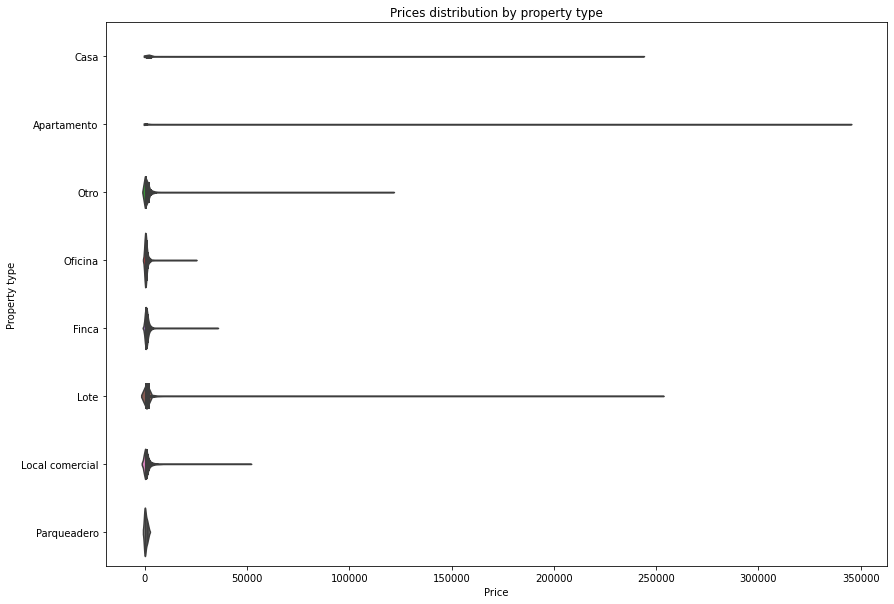

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
sns.violinplot(
    x       = 'price',
    y       = 'property_type',
    data    = train2,
    palette = 'tab10',
    inner   = 'stick',
    ax      = ax
)
ax.set_title('Prices distribution by property type')
ax.set_xlabel('Price')
ax.set_ylabel('Property type')
plt.show()

#### We can see a pretty outliered distribution. Comes to my curiosity why an aparment would cost more than a finca

# MISSING VALUES FIRST SIGHT

First we drop columns we specified earlier: 
- Operation_Type, Price_Period, L1 and Ad_Type has only 1 unique value. 
- Fecha and Cierre imported and merged from Cotizacion to transform every value to COP (colombian pesos)
- Currency as all values are COP now
- created_on as we don't need it, we will use start and end date below. 

In [33]:
todrop = ['operation_type', 'currency', 'created_on', 'Fecha', 'Cierre', 'price_period', 'l1', 'ad_type']
train.drop(todrop, axis=1, inplace=True)

In [34]:
list = train.isna().sum()
list = list[list > 0]
list

lat                 13214
lon                 13214
l3                   9328
l4                  79014
l5                  92504
l6                 105994
rooms               85955
bedrooms            73227
bathrooms           30785
surface_total      104831
surface_covered    102388
price                  59
title                   1
description             1
dtype: int64

<AxesSubplot:>

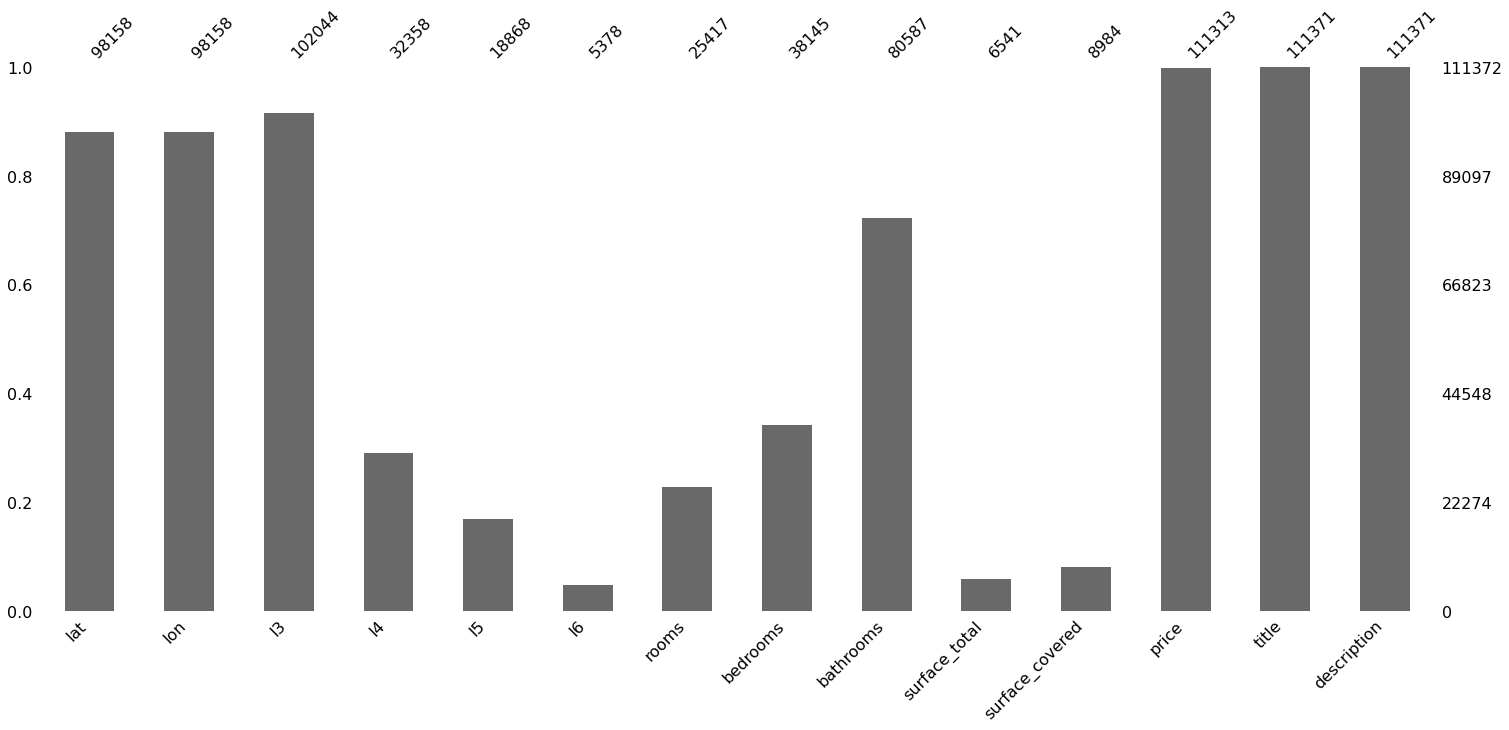

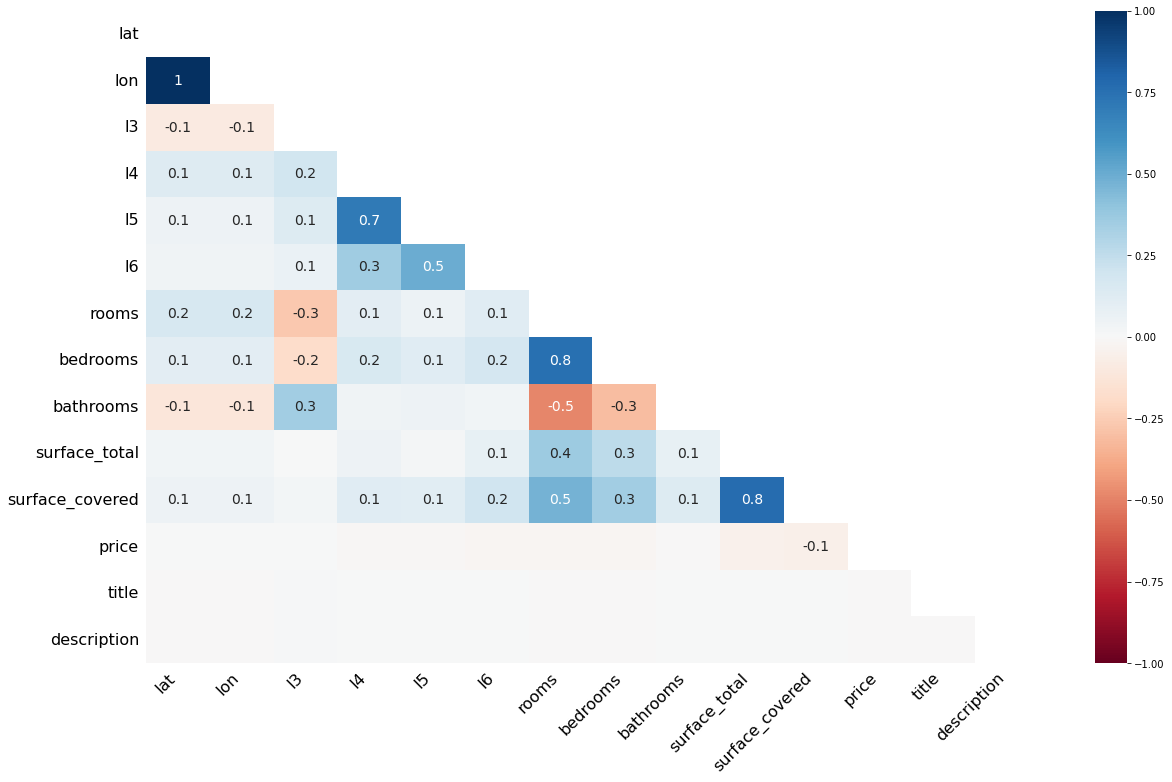

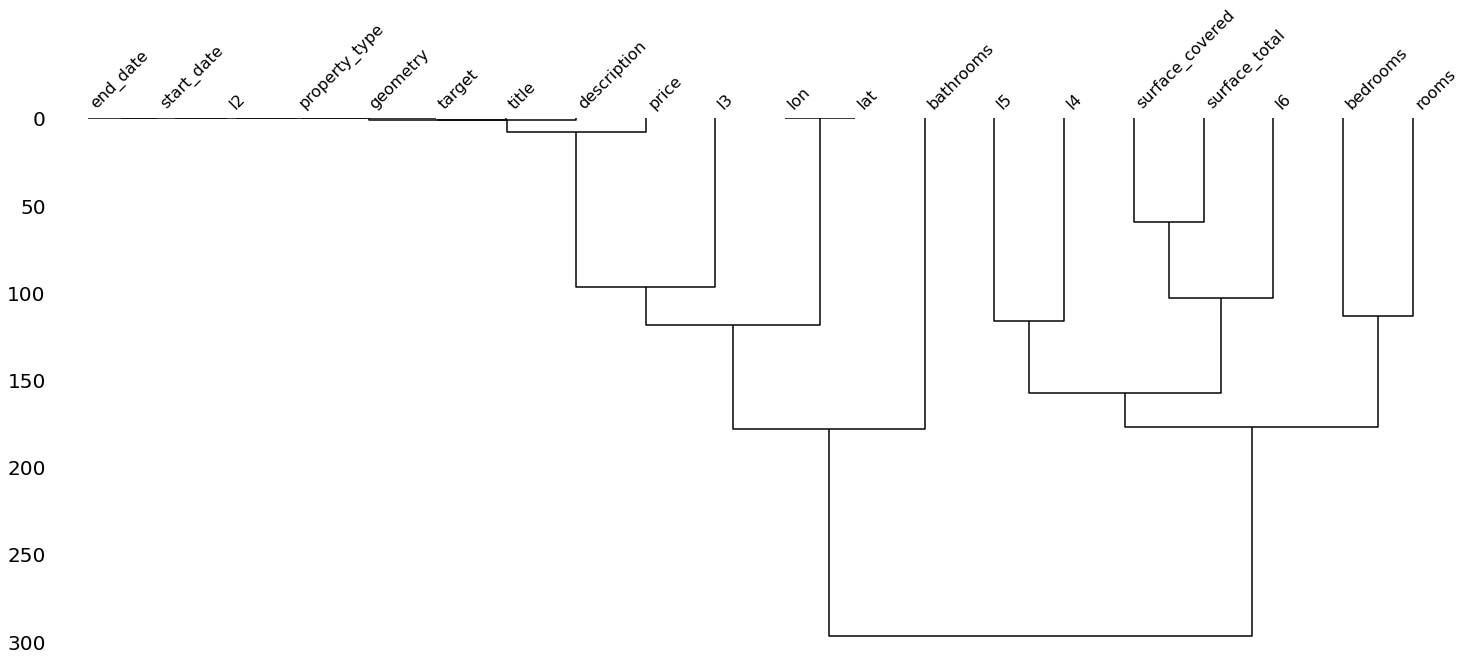

In [35]:
msno.bar(train.loc[:, train.isna().any()])
msno.heatmap(train)
msno.dendrogram(train)

### As we can see we have plenty of missing values in key features that can predict price so we will try to do some feature extraction in TITLE AND DESCRIPTION 

## TITLE AND DESCRIPTION

#### First we clean a little the text from symbols, html parses and trim-lowercase

In [36]:
train.loc[:,['title', 'description']].sample(10)

,title,description
5771,Vendo Apartamento Primer Piso Área 70 m² Vill...,"Apartamento de 70 mts2, Cuenta con 3 habitacio..."
42545,Apartamento Palatino - Cedritos,HERMOSO APARTAMENTO EDIFICIO PALATINO - CEDRIT...
64821,"Vendo Apartamento sur de Cali,sector lili","Vendo Apartamento en Lili sur de Cali, Edifici..."
25390,VENTA CASA EXTERNA B/EL GUABAL CALI SUR (VT),"Hermosa Casa externa en el barro El Guabal, co..."
47579,En venta Penthouse plazuela cañaveral remodelado,En venta Amplio Penthouse plazuela cañaveral.\...
90372,Casa en Venta Nuevo Horizonte Los Alpes REMODE...,Casa en Venta en barrio Nuevo Horizonte Los Al...
473,APARTAMENTO EN VENTA EN CAMPOHERMOSO MANIZALE...,Excelente ubicación. Duplex de Tres alcobas co...
10641,VENDO APARTAMENTO 1ER PISO COLSEGUROS (CM) _ w...,VENDO APARTAMENTO 1ER PISO COLSEGUROS (CM) CÓD...
103525,SE VENDE AMPLIO APARTAMENTO EN MERCEDES NORTE,SE VENDE AMPLIO Y CÓMODO APARTAMENTO EN MERCED...
54804,Apartamento En Venta En Cartagena Bocagrande C...,"Apartamento en el mejor sector de cartagena, b..."


##### Check functions.py to description of functions

In [37]:
train = trim_all_columns(train)
train['title'] = normalize_column(train, 'title')
train['description'] = normalize_column(train, 'description')
train['title'] = train['title'].str.lower().str.strip()
train['description'] = train['description'].str.lower().str.strip()

In [38]:
pattern = '|'.join(['\n','\r', '\t' ,'\xa0','\u200b',','])
train['title'] = clean_values(train['title'], pattern, value=' ')
train['description'] = clean_values(train['description'], pattern, value=' ')

In [39]:
pattern2 = '|'.join(['_', '[(|)]', '-',':',';'])
train['title'] = clean_values(train['title'], pattern2, regex = True, value=' ')
train['description'] = clean_values(train['description'], pattern2, regex = True, value=' ')

In [40]:
train['title'] = clean_values(train['title'], r"\<.*?\>", regex = True, value=' ')
train['description'] = clean_values(train['description'], pattern2, regex = True, value=' ')

train['title'] = clean_values(train['title'], r"\{.*?\}", regex = True, value=' ')
train['description'] = clean_values(train['description'], pattern2, regex = True, value=' ')

In [41]:
train['title'] = train['title'].str.replace(' +',' ', regex=True)
train['description'] = train['description'].str.replace(' +',' ', regex = True)

In [42]:
train['description'] = train['description'].str.replace('br / ','',regex = False)
train['description'] = train['description'].str.replace('/b','',regex = False)
train['description'] = train['description'].str.replace(' br ','',regex = False)
train['description'] = train['description'].str.replace(' b ','',regex = False)
train['description'] = train['description'].str.replace('&aacute ','a',regex = False)
train['description'] = train['description'].str.replace('&eacute ','e',regex = False)
train['description'] = train['description'].str.replace('&iacute ','i',regex = False)
train['description'] = train['description'].str.replace('&oacute ','o',regex = False)
train['description'] = train['description'].str.replace('&uacute ','u',regex = False)
train['description'] = train['description'].str.replace('&ntilde ','ñ',regex = False)
train['description'] = train['description'].str.replace('ref#\d+','',regex = True)
train['description'] = train['description'].str.replace('!!!','',regex = False)

#### Let see a WordCloud to visualize string data importance in description

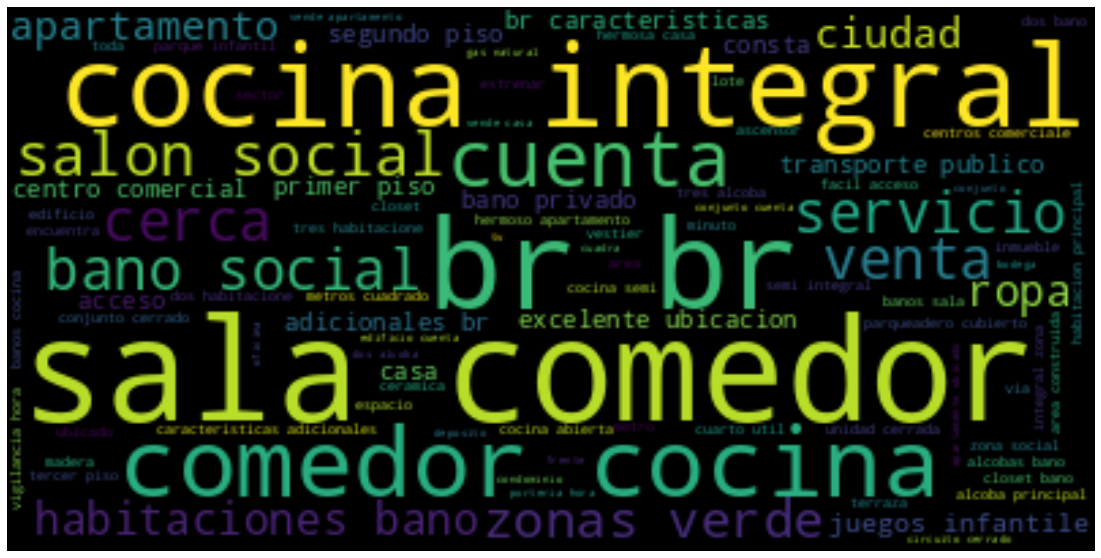

In [43]:
description_plain_text = train['description'].str.cat(sep=' ')
cloud_prueba = WordCloud(stopwords = stopwords).generate(description_plain_text)
plt.figure(figsize=(20,10))
plt.imshow(cloud_prueba, interpolation='bilinear')
plt.axis('off')
plt.show()

## REGEX feature extraction

#### Let's extract strings and create new features with REGEX from DESCRIPTION:
- M2 - metros cuadrados
- Nro baños
- Nro habitaciones
- Piscina
- Vigilancia 24hs
- Patio
- Parqueadero/garage
- Balcon
- Cancha
- Gimnasio/gym
- Sauna
- A Estrenar

I'm not a real state bussiness man but as a person who has moved 7 times in the last 15 years I know this features usually are related with more expensive sales/rent prices

### Metros cuadrados

We have only 5000 values - rest is missing.

In [44]:
train['surface_total'].isna().sum()
train['surface_total'].sort_values(ascending=False).head(20)

95095    180000.00
72572    180000.00
95258    175000.00
10565    165000.00
16470    160000.00
26179    150000.00
83845    130878.00
47392    119000.00
46090    115200.00
59520    100000.00
100780   100000.00
78827    100000.00
87240     90000.00
90453     80000.00
108395    70400.00
100112    70000.00
81568     67783.00
109619    65914.00
73404     64000.00
47743     64000.00
Name: surface_total, dtype: float64

In [45]:
train.loc[:,'title'].values[0]

'hermosa mansion en el poblado area construida 900m2 '

In [46]:
regex = r"(\d+\.?\d+(?=m2| m2| mts2| metros cuadrados| mts))"

# True values means that M2 information is contained in the string
mask1 = train.loc[:,'title'].str.extract(regex, expand = False).notna()
mask2 = train.loc[:,'description'].str.extract(regex, expand = False).notna()

There are over 60.000 values we can extract with this pattern

In [47]:
print(mask1.value_counts())
mask2.value_counts()

False    107346
True       4026
Name: title, dtype: int64


False    75229
True     36143
Name: description, dtype: int64

If the values are missing, we are gonna put these new values extracted from description

In [48]:
mask_na = train['surface_total'].isna()

Checking if we have captured no phone number on title or others big numbers

In [49]:
pd.to_numeric(train.loc[mask_na & mask1, 'title'].str.extract(regex, expand = False), errors='coerce').sort_values(ascending=False).head(20)

110515    54800
41943     53773
103750    53000
25303     53000
90766     53000
29602     53000
106353    38916
65723     30000
18060     27200
88964     23000
43848     22454
54754     20000
81469     13400
96094     12500
21799     12500
67440     12500
11329     12000
59017     12000
64257     12000
12313     10000
Name: title, dtype: int64

Checking the same for description

In [50]:
pd.to_numeric(train.loc[mask_na & mask2, 'description'].str.extract(regex, expand = False), errors='coerce').sort_values(ascending=False).head(10)

29058    305806274.00
97001      3420000.00
44977       260000.00
100159      260000.00
13242       150000.00
58557       128000.00
28324       100000.00
85270        96250.00
107596       95000.00
72736        92400.00
Name: description, dtype: float64

This is the only value wrong captured so we keep it as NA

In [51]:
print(train.loc[29058,'description'])

vendo apartamento torres de comfandi cm codigo wasi 305806274 mts 5to piso con ascensor 3 habitaciones 2 banos minibar buena vista hacia la 1era parqueadero en sotano. $ 235 millones minimo. admon 210. la unidad con piscina zona social zona de juegos excelente ubicacion


Now we actually capture and record this on the dataframe

In [52]:
train.loc[mask_na & mask1, 'surface_total'] = train.loc[mask_na & mask1, 'title'].str.extract(regex, expand = False)
train.loc[mask_na & mask2, 'surface_total'] = train.loc[mask_na & mask2, 'description'].str.extract(regex, expand = False)

We can still extract surface_covered data and put it on the surface_total feature

In [53]:
mask1 = train['surface_total'].isna()
mask2 = train['surface_covered'].notna()
train.loc[mask1 & mask2,'surface_total'] = train.loc[mask1 & mask2,'surface_covered']

Despite the feature extraction, we still have over 60% of missing values which can be misleading

In [54]:
train['surface_total'] = pd.to_numeric(train['surface_total'], errors='coerce')
train.loc[29058,'surface_total']= np.nan
train['surface_total'].isna().sum()/train.shape[0]*100

60.29881837445677

In [55]:
train['surface_total'].sort_values(ascending=False).head(10)

106134   3480000.00
97001    3420000.00
83249     780456.00
22406     384000.00
33030     300000.00
44977     260000.00
100159    260000.00
95095     180000.00
72572     180000.00
95258     175000.00
Name: surface_total, dtype: float64

Last checking for this giant values, they are actually OK, they correspond to hacienda/finca

In [56]:
print(train.loc[97001,'description'])
print(train.loc[106134,'description'])

se vende finca en el municipio de urra vereda la ana a 15 minutos desde el pueblo por carretera destapada con un arera 3420000 metros cuadrados con un area construida de 400 metros cuadrados con pesebrera corral con bascula cuarto de acopio de frruta potreros con pasto para ganado buenas aguas.
hacienda a 1 hora de manizales 348 hectareas potencial para citricos ganaderia lecheria tropical cacao. cuenta con 2 casas y espacio diseado para lecheria o centro de acopio para frutas tres nacimientos de agua tres diferentes entradas desde concesin pacifico 3 2 vas de acceso para camin


### Hectareas

Some properties are specified in description as hectareas, not metros cuadrados. We are gonna extract this info and transform the data

In [57]:
regex = r"(\d+\.?\d+(?=hectareas| hectareas|hectáreas| hectáreas|hectárea| hectárea|hectare| hectare|has| has))"
train.loc[:,'description'].str.extract(regex, expand = False).dropna().astype(float).sort_values(ascending = False).head(10)

55158    29796556.00
60622    27000022.00
55538       24000.00
38983       22972.00
100708      22972.00
47347       22972.00
81191        2020.00
1077         1500.00
94368        1500.00
11705        1493.00
Name: description, dtype: float64

Just checking some values extracted from description

In [58]:
check = train.loc[:,'description'].str.extract(regex, expand = False).dropna().astype(float).sort_values(ascending = False).head(4).index.tolist()
train.loc[check,'description'].values

array(['espectacular lote cartagena cerca a la playa c.v 29796556 hectareas$45 000 mtaceptan 30 % en permuta.',
       'finca ubicada en maceo antioquia. la autopista 4g que va para la costa pasara a 4 km de la finca. area de 27000022 hectareas. a 12 km del pueblo 4 ha en cacao en plena produccion y 6 potreros con pasto briachiaria. tiene casa y buenas aguas. precio 270 millones negociable. vendo lotes de varios precios casas apartamentos fincas de recreo fincas ganaderas locales bodegas y otras propiedades. le consigo el tipo de propiedad que requiera hago gestion y acompanamiento en todo el proceso de la negociacion.',
       'area de 24000 hectareas casa principal 220 mtrs 6 alcobas 6 closet 3 banos sala comedor 2 cocinas integrales patio de ropas balcon pisos en ceramica casa en construccion liviana administrador 25 potreros divididos con cerca electrica pastos variedad estrella yacimiento de agua jardin area bbq carretera pavimentada.',
       'ubicacion departamento del casanare 

Finally replacing all the values and transforming it to meters

In [59]:
indexes = train.loc[:,'description'].str.extract(regex, expand = False).dropna().astype(float).sort_values(ascending = False).index.tolist()

train.loc[indexes, 'surface_total'] = train.loc[indexes,'description'].str.extract(regex, expand = False).dropna().astype(float).mul(10000)

## Piscina

In [60]:
value = '|'.join(['pileta', 'piscina','natatorio'])
train['pileta'] = train['description'].str.contains(value, regex = True, case = False)
train['pileta'].value_counts()
train['pileta'].fillna(False, inplace=True)

## Vigilancia 24hs

In [61]:
value = '|'.join(['vigilancia 24', 'porteria 24', 'seguridad 24', 'vigilancia las 24', 'porteria las 24', 'seguridad las 24'])
train['vigilancia'] = train['description'].str.contains(value, regex = True, case = False)
train['vigilancia'].value_counts()
train['vigilancia'].fillna(False, inplace=True)

## Patio

In [62]:
value = '|'.join(['patio', 'jardin', 'parque'])
train['patio'] = train['description'].str.contains(value, regex = True, case = False)
train['patio'].value_counts()
train['patio'].fillna(False, inplace=True)

## Garage

In [63]:
value = '|'.join(['garage', 'garaje', 'cochera', 'parquedero'])
train['garage'] = train['description'].str.contains(value, regex = True, case = False)
train['garage'].value_counts()
train['garage'].fillna(False, inplace=True)

## Balcon

In [64]:
value = '|'.join(['balcon', 'balcn', 'valcon'])
train['balcon'] = train['description'].str.contains(value, regex = True, case = False)
train['balcon'].value_counts()
train['balcon'].fillna(False, inplace=True)

## Cancha

In [65]:
value = '|'.join(['cancha'])
train['cancha'] = train['description'].str.contains(value, regex = True, case = False)
train['cancha'].value_counts()
train['cancha'].fillna(False, inplace=True)

## Gimnasio

In [66]:
value = '|'.join(['gimnasio', 'gym', 'gim', 'fitnes'])
train['gimnasio'] = train['description'].str.contains(value, regex = True, case = False)
train['gimnasio'].value_counts()
train['gimnasio'].fillna(False, inplace=True)

## Sauna

In [67]:
value = '|'.join(['sauna', 'solarium', 'ducha turca', 'ducha escocesa'])
train['sauna'] = train['description'].str.contains(value, regex = True, case = False)
train['sauna'].value_counts()
train['sauna'].fillna(False, inplace=True)

### A estrenar

In [68]:
value = '|'.join(['estren'])
train['a_estrenar'] = train['description'].str.contains(value, regex = True, case = False)
train['a_estrenar'].value_counts()
train['a_estrenar'].fillna(False, inplace=True)

## Nro baños

### With REGEX

In [69]:
train['bathrooms'].isna().value_counts()

False    80587
True     30785
Name: bathrooms, dtype: int64

In [70]:
regex = r"(\d+(?=bano| bano|banio| banio))"
mask = train.loc[:,'bathrooms'].isna()
train.loc[mask, 'bathrooms'] = train.loc[mask, 'description'].str.extract(regex, expand = False)
train['bathrooms'].isna().value_counts()


False    88753
True     22619
Name: bathrooms, dtype: int64

In [71]:
train['bathrooms'] = pd.to_numeric(train['bathrooms'], errors = 'coerce')

In [72]:
train['bathrooms'].describe()

count   88753.00
mean        2.67
std         1.58
min         0.00
25%         2.00
50%         2.00
75%         3.00
max       125.00
Name: bathrooms, dtype: float64

## With SPACY Matcher

In [73]:
train.columns

Index(['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'l4', 'l5', 'l6',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'title', 'description', 'property_type', 'geometry', 'target',
       'pileta', 'vigilancia', 'patio', 'garage', 'balcon', 'cancha',
       'gimnasio', 'sauna', 'a_estrenar'],
      dtype='object')

In [74]:
train['description'][1]

'venta apartamento en piso 16 con vista exterior. tiempo de construido 2 anos. area 122 m2 distribuidos de la siguiente manera tres habitaciones sala comedor cocina tipo americana dos banos. dos parqueaderos privados un deposito. el conjunto cuenta con seguridad las veinticuatro horas gym salon comunal piscina billar mesa de ping pong cancha de fooball. el apartamento de tus suenos lo acabas de encontrar. llamenos para tener el privilegio de atenderlos. gracias'

In [75]:
train['description'].fillna(' ', inplace=True)

In [77]:
#!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [78]:
from spacy.matcher import Matcher
import spacy
nlp = spacy.load('es_core_news_lg')

match_banios = ['bano','banos','banios','banio','baño','baños','baos','bao','sanitario','sanitarios']

matcher_banios = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern_banios = [
    {'LIKE_NUM': True},
    {'IS_ALPHA': True, 'TEXT':{'IN':match_banios}}
]

matcher_banios.add('X_banios', [pattern_banios])

lista_banios_final = []

for i in range(train.shape[0]):
    text = train['description'][i]
    doc = nlp(text)
    matches_banios = matcher_banios(doc) #Gives you and index unique ID, start and end of the match
    lista_banios = []
    if matches_banios != []:
        for match_id, start, end in matches_banios:
            # Get the matched span
            matched_span = doc[start:end]
            lista_banios.append(matched_span.text)
    else:
        lista_banios.append('99')
    lista_banios_final.append(lista_banios)

In [79]:
import re

lista_clean = []

for sublist in lista_banios_final:
    for item in sublist:
        item = re.sub('uno', '1', item)
        item = re.sub('un', '1', item)
        item = re.sub('dos', '2', item)
        item = re.sub('tres', '3', item)
        item = re.sub('cuatro', '4', item)
        item = re.sub('cinco', '5', item)
        item = re.sub('seis', '6', item)
        item = re.sub('siete', '7', item)
        item = re.sub('ocho', '8', item)
        item = re.sub('nueve', '9', item)
        item = re.sub('diez', '10', item)
        lista = re.findall(r'\d+', item)
        lista = [int(x) for x in lista]
        lista_clean.append(sum(lista))

In [80]:
sum(lista_clean)

6673682

In [81]:
df_banios = pd.DataFrame(lista_clean, columns = ['bathrooms_2'])

In [82]:
df_banios.describe()

,bathrooms_2
count,115018.00
mean,58.02
std,48.13
min,0.00
25%,2.00
50%,99.00
75%,99.00
max,1994.00


In [83]:
df_banios['bathrooms_2'].apply(lambda x: x if x <11 else np.nan).isna().value_counts()

True     66346
False    48672
Name: bathrooms_2, dtype: int64

In [84]:
df_banios['bathrooms_2'] = df_banios['bathrooms_2'].apply(lambda x: x if x <11 else np.nan)

<AxesSubplot:>

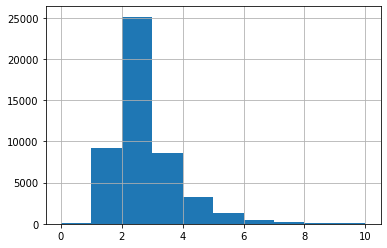

In [85]:
df_banios['bathrooms_2'].hist()

In [86]:
train.merge(df_banios, left_index = True, right_index = True)

,start_date,end_date,lat,lon,l2,l3,l4,l5,l6,rooms,...,pileta,vigilancia,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar,bathrooms_2
0,2020-12-14,9999-12-31,6.20,-75.57,Antioquia,Medellín,El Poblado,NaN,NaN,NaN,...,True,False,True,False,True,True,True,False,False,NaN
1,2020-09-16,2021-05-14,4.72,-74.07,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,...,True,False,True,False,False,True,True,False,False,2.00
2,2020-08-19,2020-08-20,4.71,-74.03,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,...,False,False,False,False,True,True,False,False,False,NaN
3,2020-11-23,2020-11-30,NaN,NaN,Santander,Bucaramanga,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN
4,2020-10-06,2020-10-07,NaN,NaN,Antioquia,Medellín,NaN,NaN,NaN,NaN,...,True,True,True,False,True,False,False,False,False,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111367,2020-11-26,9999-12-31,6.34,-75.55,Antioquia,Bello,NaN,NaN,NaN,NaN,...,False,False,True,False,False,False,False,False,True,2.00
111368,2020-12-02,2021-01-20,4.83,-75.76,Risaralda,NaN,NaN,NaN,NaN,6.00,...,True,False,True,False,False,False,False,False,False,NaN
111369,2020-10-15,2020-10-15,4.81,-75.66,Risaralda,Pereira,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,NaN
111370,2020-11-30,2021-05-19,7.06,-73.11,Santander,Floridablanca,NaN,NaN,NaN,NaN,...,False,False,True,False,False,False,False,False,False,2.00


In [87]:
train['bathrooms'].describe()

count   88753.00
mean        2.67
std         1.58
min         0.00
25%         2.00
50%         2.00
75%         3.00
max       125.00
Name: bathrooms, dtype: float64

In [88]:
train.loc[train['bathrooms'] > 2, 'bathrooms'].count()

37248

In [89]:
train['bathrooms_cat'] = pd.cut(train['bathrooms'], bins = [0,1,2,3,np.inf], labels = ['0','1','2','3 o mas'])
train['bathrooms_cat'].value_counts()

1          37690
3 o mas    18746
2          18502
0          13776
Name: bathrooms_cat, dtype: int64

<BarContainer object of 4 artists>

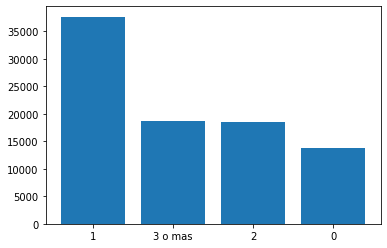

In [90]:
plt.bar(train['bathrooms_cat'].value_counts().index, train['bathrooms_cat'].value_counts())

## Nro habitaciones

In [91]:
train['bedrooms'].isna().value_counts()

True     73227
False    38145
Name: bedrooms, dtype: int64

In [92]:
regex = r'(\d+(?=habitac| habitac |alcob| alcob|cuart| cuart))'
mask = train.loc[:,'bedrooms'].isna()
train.loc[mask, 'bedrooms'] = train.loc[mask, 'description'].str.extract(regex, expand = False)
train['bedrooms'].isna().value_counts()

True     56391
False    54981
Name: bedrooms, dtype: int64

In [93]:
train['bedrooms'] = pd.to_numeric(train['bedrooms'], errors = 'coerce')

In [94]:
train['bedrooms_cat'] = pd.cut(train['bedrooms'], bins = [0,1,2,3,np.inf], labels = ['0','1','2','3 o mas'])
train['bedrooms_cat'].value_counts()

2          28696
3 o mas    13077
1           9598
0           2656
Name: bedrooms_cat, dtype: int64

<BarContainer object of 4 artists>

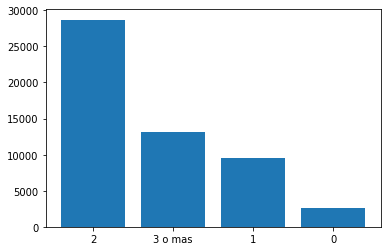

In [95]:
plt.bar(train['bedrooms_cat'].value_counts().index, train['bedrooms_cat'].value_counts())

In [96]:
from spacy.matcher import Matcher
import spacy
nlp = spacy.load('es_core_news_lg')

list_match_dorm = ['alcoba','alcobas','dormitorios','habitaciones','dormitorio','pieza',
'habitacion','cuarto','cuartos','piezas','habitac','dorms','habitcs']

matcher_dorm = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern_dorm = [
    {'LIKE_NUM': True},
    {'IS_ALPHA': True, 'TEXT':{'IN':list_match_dorm}}
]

matcher_dorm.add('X_dorm', [pattern_dorm])

lista_dorm_final = []

for i in range(train.shape[0]):
    text = train['description'][i]
    doc = nlp(text)
    matches_dorm = matcher_dorm(doc) #Gives you and index unique ID, start and end of the match
    lista_dorm = []
    if matches_dorm != []:
        for match_id, start, end in matches_dorm:
            # Get the matched span
            matched_span = doc[start:end]
            lista_dorm.append(matched_span.text)
    else:
        lista_dorm.append('99')
    lista_dorm_final.append(lista_dorm)

In [97]:
import re

lista_clean_2 = []

for sublist in lista_dorm_final:
    for item in sublist:
        item = re.sub('uno', '1', item)
        item = re.sub('un', '1', item)
        item = re.sub('dos', '2', item)
        item = re.sub('tres', '3', item)
        item = re.sub('cuatro', '4', item)
        item = re.sub('cinco', '5', item)
        item = re.sub('seis', '6', item)
        item = re.sub('siete', '7', item)
        item = re.sub('ocho', '8', item)
        item = re.sub('nueve', '9', item)
        item = re.sub('diez', '10', item)
        lista = re.findall(r'\d+', item)
        lista = [int(x) for x in lista]
        lista_clean_2.append(sum(lista))

In [98]:
df_dorm = pd.DataFrame(lista_clean, columns = ['bedrooms_2'])
print(df_dorm['bedrooms_2'].apply(lambda x: x if x <11 else np.nan).isna().value_counts())
df_dorm['bedrooms_2'].apply(lambda x: x if x <11 else np.nan)

True     66346
False    48672
Name: bedrooms_2, dtype: int64


0         NaN
1        2.00
2         NaN
3         NaN
4        2.00
         ... 
115013    NaN
115014   7.00
115015   2.00
115016    NaN
115017    NaN
Name: bedrooms_2, Length: 115018, dtype: float64

In [99]:
df_dorm.describe()

,bedrooms_2
count,115018.00
mean,58.02
std,48.13
min,0.00
25%,2.00
50%,99.00
75%,99.00
max,1994.00


array([[<AxesSubplot:title={'center':'bedrooms_2'}>]], dtype=object)

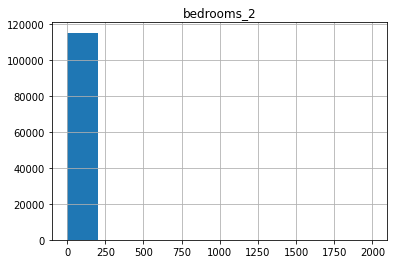

In [100]:
df_dorm.hist(bins=10)

In [101]:
train.merge(df_dorm, left_index = True, right_index = True)

,start_date,end_date,lat,lon,l2,l3,l4,l5,l6,rooms,...,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar,bathrooms_cat,bedrooms_cat,bedrooms_2
0,2020-12-14,9999-12-31,6.20,-75.57,Antioquia,Medellín,El Poblado,NaN,NaN,NaN,...,True,False,True,True,True,False,False,3 o mas,3 o mas,99
1,2020-09-16,2021-05-14,4.72,-74.07,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,...,True,False,False,True,True,False,False,1,2,2
2,2020-08-19,2020-08-20,4.71,-74.03,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,...,False,False,True,True,False,False,False,1,NaN,99
3,2020-11-23,2020-11-30,NaN,NaN,Santander,Bucaramanga,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,0,NaN,99
4,2020-10-06,2020-10-07,NaN,NaN,Antioquia,Medellín,NaN,NaN,NaN,NaN,...,True,False,True,False,False,False,False,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111367,2020-11-26,9999-12-31,6.34,-75.55,Antioquia,Bello,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,True,0,2,2
111368,2020-12-02,2021-01-20,4.83,-75.76,Risaralda,NaN,NaN,NaN,NaN,6.00,...,True,False,False,False,False,False,False,3 o mas,3 o mas,99
111369,2020-10-15,2020-10-15,4.81,-75.66,Risaralda,Pereira,NaN,NaN,NaN,NaN,...,False,False,True,False,False,False,False,1,NaN,99
111370,2020-11-30,2021-05-19,7.06,-73.11,Santander,Floridablanca,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,1,2,2


## GPS
We have 25% of missing values for lat/long, geometry is redundant cause it has aditional info

In [102]:
train[['lat', 'lon','geometry']].isna().sum()

lat         13214
lon         13214
geometry        0
dtype: int64

In [103]:
train.loc[train['geometry'] == 'POINT EMPTY', ['lat', 'lon','geometry']].sample(10)

,lat,lon,geometry
102305,NaN,NaN,POINT EMPTY
3818,NaN,NaN,POINT EMPTY
51186,NaN,NaN,POINT EMPTY
41546,NaN,NaN,POINT EMPTY
83465,NaN,NaN,POINT EMPTY
45085,NaN,NaN,POINT EMPTY
13709,NaN,NaN,POINT EMPTY
13104,NaN,NaN,POINT EMPTY
78157,NaN,NaN,POINT EMPTY
14516,NaN,NaN,POINT EMPTY


In [104]:
train.drop('geometry', axis = 1, inplace = True)

We are gonna replace NA values of lat/lon with GPS coordinates of the city. We previously gather this info in CSV. 

Check the GEOGRAPHY ANALYSIS NOTEBOOK. 

Here we can see that 100% of lat/lon NA can be replaced with GPS coordinates extracted by location name

In [105]:
mask_l2 = train.loc[:,'l2'].notna()
mask_l3 = train.loc[:,'l3'].notna()
mask_l4 = train.loc[:,'l4'].notna()
mask_l5 = train.loc[:,'l5'].notna()
mask_l6 = train.loc[:,'l6'].notna()
mask_lat = train.loc[:,'lat'].isna()
mask_lon = train.loc[:,'lon'].isna()

train.loc[(mask_l2 | mask_l3 | mask_l4 | mask_l5 | mask_l6) & (mask_lat & mask_lon), ['l2','l3','l4','l5','l6','lat','lon']].count()


l2     13214
l3     12967
l4      1755
l5      1536
l6       335
lat        0
lon        0
dtype: int64

We gather the info and merge with our database

In [106]:
locations_gps = pd.read_csv('./data/gps/locations_all_df_google.csv')

In [107]:
locations_gps

,l_all,lat,lon
0,"Bucaramanga,Santander,Colombia",7.12,-73.12
1,"Medellín,Antioquia,Colombia",6.25,-75.57
2,"Barranquilla,Atlántico,Colombia",11.00,-74.81
3,"Montería,Córdoba,Colombia",8.75,-75.88
4,"Villa Maria,Suba,Zona Noroccidental,Bogotá D.C...",4.74,-74.10
...,...,...,...
267,"El Rosal,Cundinamarca,Colombia",4.85,-74.26
268,"Prado,Tolima,Colombia",3.75,-74.93
269,"Zona Franca,Fontibón,Zona Occidental,Bogotá D....",5.03,-74.03
270,"20 De Julio,Antonio Nariño,Zona Sur,Bogotá D.C...",5.03,-74.03


In [108]:
train['full_location'] = train.agg(lambda x: f"{x['l6']},{x['l5']},{x['l4']},{x['l3']},{x['l2']},Colombia", axis=1)
train['full_location'] = train['full_location'].str.replace('nan,','')
train['full_location']

0                    El Poblado,Medellín,Antioquia,Colombia
1         Suba,Zona Noroccidental,Bogotá D.C,Cundinamarc...
2         Bella Suiza,Usaquén,Zona Norte,Bogotá D.C,Cund...
3                            Bucaramanga,Santander,Colombia
4                               Medellín,Antioquia,Colombia
                                ...                        
111367                             Bello,Antioquia,Colombia
111368                                   Risaralda,Colombia
111369                           Pereira,Risaralda,Colombia
111370                     Floridablanca,Santander,Colombia
111371    Kennedy,Zona Suroccidental,Bogotá D.C,Cundinam...
Name: full_location, Length: 111372, dtype: object

In [109]:
train = train.merge(locations_gps, how='left',  left_on='full_location', right_on='l_all', suffixes=('', '_new'))

In [110]:
train.iloc[:,-4:]

,full_location,l_all,lat_new,lon_new
0,"El Poblado,Medellín,Antioquia,Colombia","El Poblado,Medellín,Antioquia,Colombia",6.21,-75.58
1,"Suba,Zona Noroccidental,Bogotá D.C,Cundinamarc...","Suba,Zona Noroccidental,Bogotá D.C,Cundinamarc...",4.72,-74.07
2,"Bella Suiza,Usaquén,Zona Norte,Bogotá D.C,Cund...","Bella Suiza,Usaquén,Zona Norte,Bogotá D.C,Cund...",4.71,-74.03
3,"Bucaramanga,Santander,Colombia","Bucaramanga,Santander,Colombia",7.12,-73.12
4,"Medellín,Antioquia,Colombia","Medellín,Antioquia,Colombia",6.25,-75.57
...,...,...,...,...
111367,"Bello,Antioquia,Colombia","Bello,Antioquia,Colombia",6.34,-75.56
111368,"Risaralda,Colombia","Risaralda,Colombia",5.32,-75.99
111369,"Pereira,Risaralda,Colombia","Pereira,Risaralda,Colombia",4.81,-75.69
111370,"Floridablanca,Santander,Colombia","Floridablanca,Santander,Colombia",7.07,-73.11


Now we replaced missing values of lat/lon with our values requested from Google API.

In [111]:
train['lat'] = np.where(train['lat'].isna(), train['lat_new'], train['lat'])
train['lon'] = np.where(train['lon'].isna(), train['lon_new'], train['lon'])

In [112]:
todrop = ['full_location', 'l_all', 'lat_new', 'lon_new']
train.drop(todrop, axis = 1, inplace = True)

Finally, we can see we only have 19 missing values

In [113]:
train[['lat', 'lon']].isna().sum()

lat    19
lon    19
dtype: int64

### EXPLORATION

In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [115]:
train.sort_values(by='lat').tail(2)

,start_date,end_date,lat,lon,l2,l3,l4,l5,l6,rooms,...,vigilancia,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar,bathrooms_cat,bedrooms_cat
100845,2020-12-17,2021-01-25,NaN,NaN,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,Salitre,NaN,...,True,True,False,False,False,False,False,False,NaN,NaN
104571,2020-12-15,2021-04-13,NaN,NaN,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,Salitre,1.00,...,False,True,False,False,False,True,False,False,0,0


In [116]:
train.sort_values(by='lat').head(2)

,start_date,end_date,lat,lon,l2,l3,l4,l5,l6,rooms,...,vigilancia,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar,bathrooms_cat,bedrooms_cat
86188,2020-09-29,2021-07-26,-32.79,-71.21,Cundinamarca,La Calera,NaN,NaN,NaN,5.00,...,False,False,False,False,False,False,False,False,3 o mas,NaN
64665,2020-11-11,2020-11-13,-4.20,-69.94,Amazonas,Leticia,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,1,NaN


Here we correct some wrong GPS values (pointing Argentina and other country). We fix it with it's corresponding location as specified in L3 to L6

In [117]:
train.loc[90779,'lat'] = np.mean(train.loc[train['l3']=='Bogotá D.C','lat'])
train.loc[90779,'lon'] = np.mean(train.loc[train['l3']=='Bogotá D.C','lon'])
train.loc[86188,'lat'] = np.mean(train.loc[train['l3']=='La Calera','lat'])
train.loc[86188,'lon'] = np.mean(train.loc[train['l3']=='La Calera','lon'])

### Let's see some plots 'expensive areas' vs 'regular areas'
For example here in Buenos Aires prices are not the same in Ezeiza than in Belgrano. Usually x3x4 higher. 

As expected: it's higher to buy a property in places with beaches and intense tourism activity than in Amazonas. 

<AxesSubplot:xlabel='l2'>

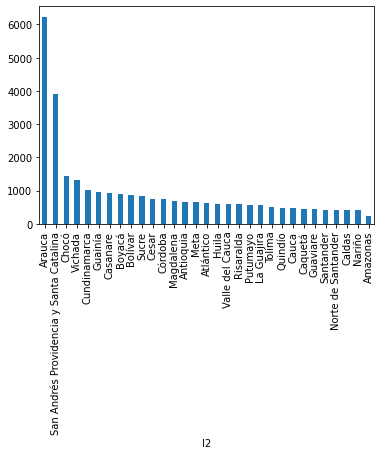

In [119]:
train.groupby('l2')['price'].mean().sort_values(ascending = False).plot(kind = 'bar')

Because we need no missing values for GPS mapping we will explore this further in notebook 3

## Date data
We eliminate previously CREATED_ON. We are gonna keep only 'start_date' and create a feature called days_published calculating total days published. 

In [120]:
train['end_date'] = pd.to_datetime(train['end_date'], errors = 'coerce')
train['start_date'] = pd.to_datetime(train['start_date'], errors = 'coerce')
train['days_published'] = train['end_date'] - train['start_date']
train['days_published'] = train['days_published'].dt.days
train.drop('end_date', axis = 1, inplace = True)

In [121]:
train['start_date'].describe()

/tmp/ipykernel_134/2179119317.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train['start_date'].describe()


count                  111372
unique                    145
top       2020-08-27 00:00:00
freq                     3464
first     2020-07-26 00:00:00
last      2020-12-31 00:00:00
Name: start_date, dtype: object

In [122]:
train['days_published'].describe()

count   99852.00
mean       59.84
std        73.85
min         0.00
25%         2.00
50%        34.00
75%        91.00
max       436.00
Name: days_published, dtype: float64

## DROPPING FEATURES

### Percentage of missing values by feature

In [123]:
list = train.isna().sum()
list = list[list > 0].div(train.shape[0]).mul(100)
list

lat                0.02
lon                0.02
l3                 8.38
l4                70.95
l5                83.06
l6                95.17
rooms             77.18
bedrooms          50.63
bathrooms         20.31
surface_total     59.91
surface_covered   91.93
price              0.05
title              0.00
bathrooms_cat     20.34
bedrooms_cat      51.49
days_published    10.34
dtype: float64

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111372 entries, 0 to 111371
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       111372 non-null  datetime64[ns]
 1   lat              111353 non-null  float64       
 2   lon              111353 non-null  float64       
 3   l2               111372 non-null  object        
 4   l3               102044 non-null  object        
 5   l4               32358 non-null   object        
 6   l5               18868 non-null   object        
 7   l6               5378 non-null    object        
 8   rooms            25417 non-null   float64       
 9   bedrooms         54981 non-null   float64       
 10  bathrooms        88753 non-null   float64       
 11  surface_total    44647 non-null   float64       
 12  surface_covered  8984 non-null    float64       
 13  price            111313 non-null  float64       
 14  title            111

I delete features which have been categorized: bathrooms and bedrooms

Rooms, surface_covered, L4, L5 and L6 have over 80% of missing values. Besides L4 to L6 are redundant, we can extract that info with GPS coordinates

I also delete 'title' and 'description'. We no longer need them for feature extraction

In [125]:
todrop = ['bedrooms', 'rooms', 'bathrooms','surface_covered', 'l4', 'l5', 'l6', 'title', 'description']
train_before_drop = train.copy()
train.drop(todrop, axis = 1, inplace = True)
train.drop(['bedrooms_cat', 'bathrooms_cat'], axis = 1, inplace = True)

In [126]:
train.describe()

,lat,lon,surface_total,price,target,days_published
count,111353.00,111353.00,44647.00,111313.00,111372.00,99852.00
mean,5.73,-75.05,12759060.59,688.11,0.25,59.84
std,2.21,1.06,1902971275.61,2411.20,0.43,73.85
min,-4.20,-81.73,0.00,0.00,0.00,0.00
25%,4.60,-75.63,62.00,200.00,0.00,2.00
50%,4.92,-75.48,98.00,340.00,0.00,34.00
75%,6.25,-74.10,214.00,650.00,1.00,91.00
max,13.35,-67.48,297965560000.00,345000.00,1.00,436.00


In [127]:
train.describe(exclude='number')

/tmp/ipykernel_134/102825196.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(exclude='number')


,start_date,l2,l3,property_type,pileta,vigilancia,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar
count,111372,111372,102044,111372,111372,111372,111372,111372,111372,111372,111372,111372,111372
unique,145,31,292,8,2,2,2,2,2,2,2,2,2
top,2020-08-27 00:00:00,Cundinamarca,Bogotá D.C,Apartamento,False,False,True,False,False,False,False,False,False
freq,3464,26967,20000,53677,84662,95823,69103,93868,81892,99196,94120,104343,106142
first,2020-07-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## OUTLIERS HANDLING

In [128]:
lista_numerical_features = train.describe(include=np.number).columns.tolist()

percentage_outliers = []

for i in lista_numerical_features:
    outlier = train[np.abs(train[i] - train[i].mean()) > 1.5*train[i].std()].shape[0]/train.shape[0]*100
    percentage_outliers.append(outlier)

outliers = pd.DataFrame({'feature': lista_numerical_features, 'outliers': percentage_outliers})
outliers.sort_values(by = 'outliers', ascending = False)

,feature,outliers
4,target,25.04
0,lat,12.20
1,lon,8.59
5,days_published,8.07
3,price,1.46
2,surface_total,0.00


As we can see there are not many outliers. Because the dataset is unbalanced, we will keep the outliers. This will be important at the time of model/algorithm selection. 

## HANDLING MISSING VALUES OF SELECTED FEATURES

<AxesSubplot:>

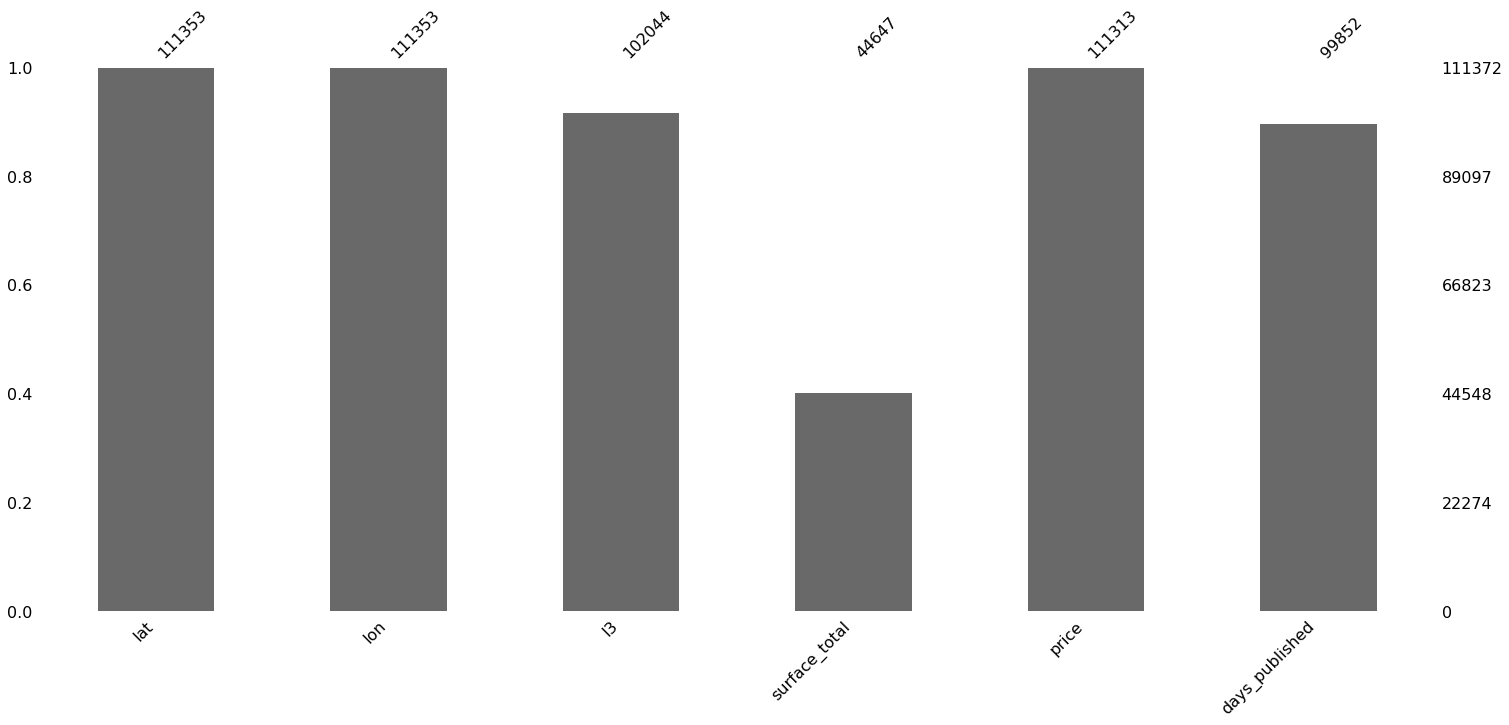

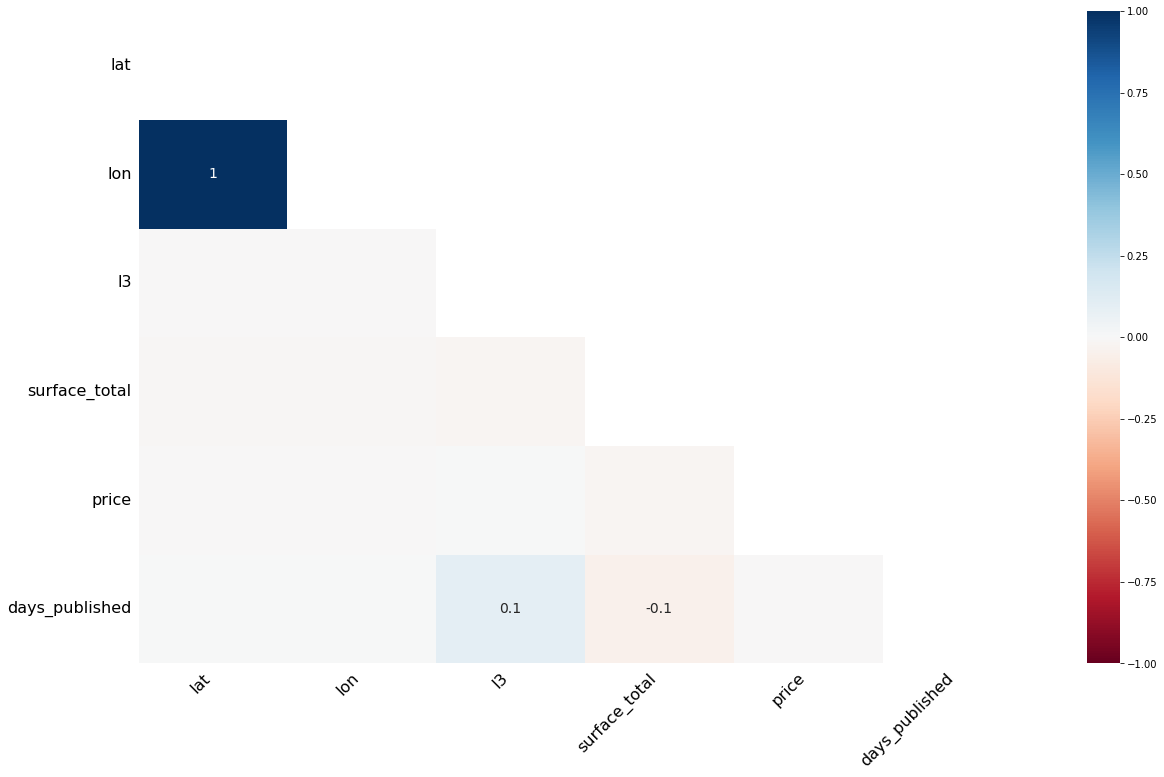

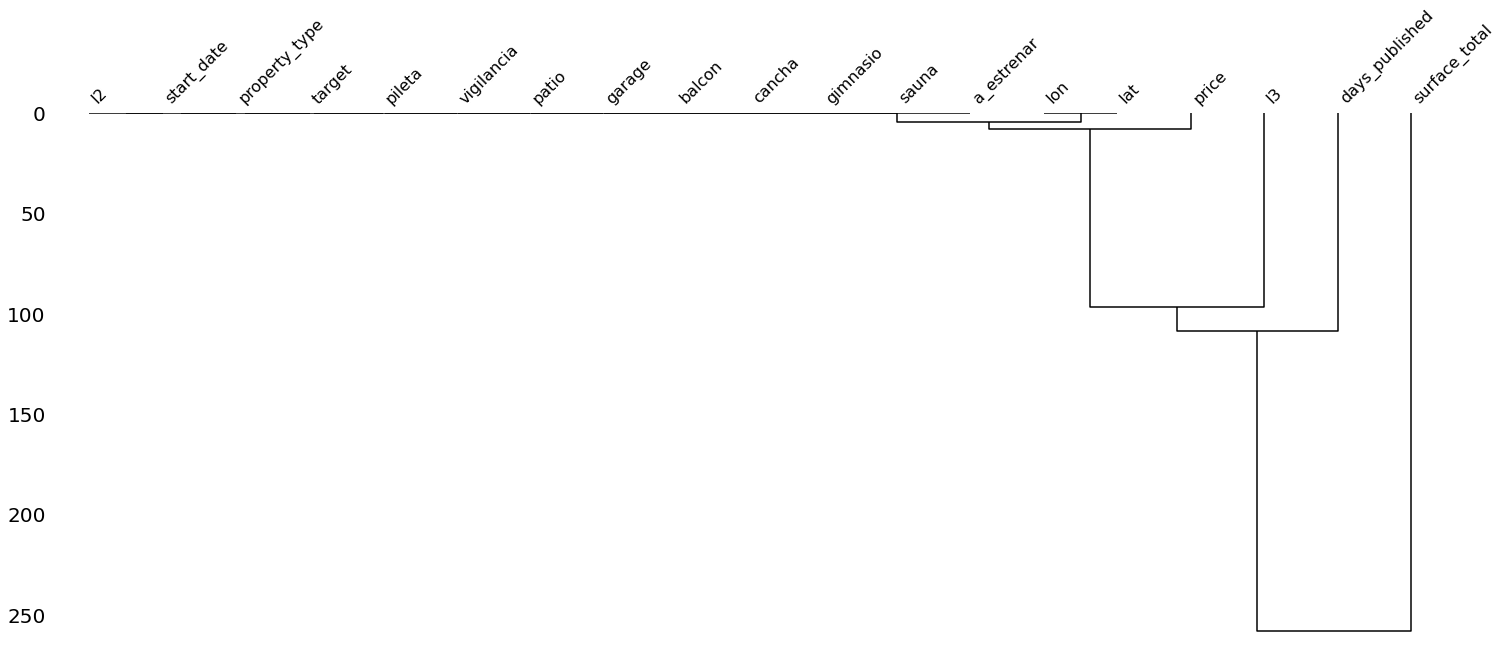

In [129]:
import missingno as msno
#Creating visualization of missing data
msno.bar(train.loc[:, train.isna().any()])
msno.heatmap(train)
msno.dendrogram(train)

As we can see we an important amount of missing data in key features (bathroom, bedrooms, surface total), by the limitation of the REGEX and Spacy extraction and customers in this dataset not entring this specs for their property sales. 
This could be because of limitations from the procedure for information extraction and also because people randomly omit that information.
This is not probably the scenario for 'lote', which is only ground an has no construction. Because this represents really a tiny amount of the dataset we will asume missing values are random. 

This enables us to to use  Multiple Imputation by Chained Equations (MICE) imputation algorithm. 

https://medium.com/@ofirdi/mice-is-nice-but-why-should-you-care-e66698f245a3

<AxesSubplot:>

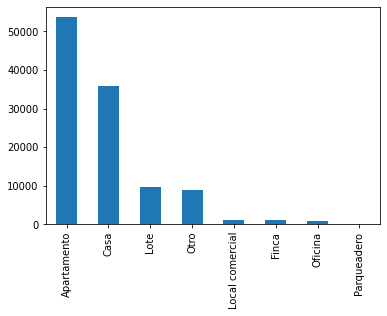

In [130]:
train['property_type'].value_counts().plot(kind = 'bar')

## IMPUTATION

### First we need to encode categorical features

In [132]:
train_copy = train.copy()
train_copy.to_csv('./data/cleaned/train_clean.csv', index = True)

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111372 entries, 0 to 111371
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   start_date      111372 non-null  datetime64[ns]
 1   lat             111353 non-null  float64       
 2   lon             111353 non-null  float64       
 3   l2              111372 non-null  object        
 4   l3              102044 non-null  object        
 5   surface_total   44647 non-null   float64       
 6   price           111313 non-null  float64       
 7   property_type   111372 non-null  object        
 8   target          111372 non-null  int64         
 9   pileta          111372 non-null  bool          
 10  vigilancia      111372 non-null  bool          
 11  patio           111372 non-null  bool          
 12  garage          111372 non-null  bool          
 13  balcon          111372 non-null  bool          
 14  cancha          111372 non-null  boo

We are not gonna encode L2,L3 cause we can't encode cause will create and ordinal and very complex feature

In [134]:
train['l3'].fillna('NA', inplace = True)

In [135]:
cat_encode = [
 'pileta',
 'vigilancia',
 'patio',
 'garage',
 'balcon',
 'cancha',
 'gimnasio',
 'sauna',
 'a_estrenar']
 #,
 #'bathrooms_cat',
 #'bedrooms_cat']

In [136]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Print the head of the categorical columns
print(train[cat_encode].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
train[cat_encode] = train[cat_encode].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(train[cat_encode].head())

   pileta  vigilancia  patio  garage  balcon  cancha  gimnasio  sauna  \
0    True       False   True   False    True    True      True  False   
1    True       False   True   False   False    True      True  False   
2   False       False  False   False    True    True     False  False   
3   False       False  False   False   False   False     False  False   
4    True        True   True   False    True   False     False  False   

   a_estrenar  
0       False  
1       False  
2       False  
3       False  
4       False  
   pileta  vigilancia  patio  garage  balcon  cancha  gimnasio  sauna  \
0       1           0      1       0       1       1         1      0   
1       1           0      1       0       0       1         1      0   
2       0           0      0       0       1       1         0      0   
3       0           0      0       0       0       0         0      0   
4       1           1      1       0       1       0         0      0   

   a_estrenar  
0         

In [137]:
train['surface_total'] = train['surface_total'].astype(float)

In [138]:
train.isna().any()

start_date        False
lat                True
lon                True
l2                False
l3                False
surface_total      True
price              True
property_type     False
target            False
pileta            False
vigilancia        False
patio             False
garage            False
balcon            False
cancha            False
gimnasio          False
sauna             False
a_estrenar        False
days_published     True
dtype: bool

In [139]:
lista_na = train.loc[:, train.isna().any()].columns.tolist()
lista_na

['lat', 'lon', 'surface_total', 'price', 'days_published']

## MICE IMPUTATION FOR MISSING VALUES

https://medium.com/@ofirdi/mice-is-nice-but-why-should-you-care-e66698f245a3

In [140]:
lista_na = train.loc[:, train.isna().any()].columns.tolist()

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

train_mice = train.filter(lista_na, axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(train_mice), columns=train_mice.columns)

train[df_mice_imputed.columns.tolist()] = df_mice_imputed

In [141]:
train_cleaned_imputed = train.copy()
train_cleaned_imputed.to_csv('./data/cleaned/train_cleaned_imputed.csv', index = True)

## Pandas profiling

In [142]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file("reporte_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4868: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## EXPLORATORY ANALYSIS WITH TARGET FEATURE

## CORRELATION PLOT

In [143]:
train.drop('price', axis = 1, inplace = True)

<AxesSubplot:>

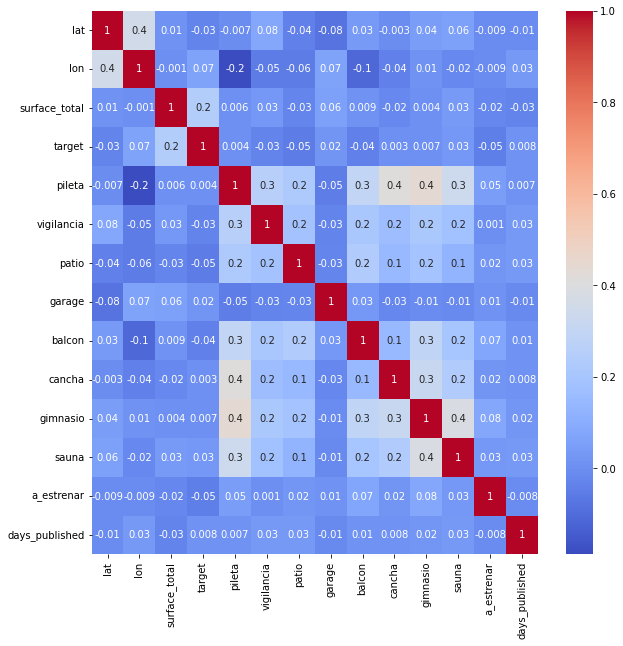

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

PENDIENTE

In [145]:
train.describe()

,lat,lon,surface_total,target,pileta,vigilancia,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar,days_published
count,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00,111372.00
mean,5.73,-75.05,12759060.57,0.25,0.24,0.14,0.62,0.16,0.26,0.11,0.15,0.06,0.05,59.83
std,2.21,1.06,1204862397.57,0.43,0.43,0.35,0.49,0.36,0.44,0.31,0.36,0.24,0.21,69.93
min,-4.20,-81.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.60,-75.63,135.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
50%,4.92,-75.48,12759060.51,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00
75%,6.25,-74.10,12759060.54,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,88.00
max,13.35,-67.48,297965560000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,436.00


### TARGET by L2

Counting expensive properties by L2 location

In [146]:
top = train_cleaned_imputed.groupby('l2').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)
top

,target
l2,
Cundinamarca,9831
Antioquia,6572
Valle del Cauca,3649
Atlántico,1878
Risaralda,1266
Caldas,1145
Bolívar,674
Santander,671
Quindío,455


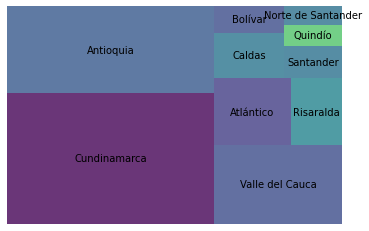

In [147]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

### TARGET BY L3

Same thing that we do with L2. We have 4 common areas (Bogota, Medellin, Cali and Barranquilla) which have more expensive properties than the rest. Probably this has to do with big urbanized areas or intense tourism activity. 
We will explore this further in the NOTEBOOK 3

In [148]:
top = train_cleaned_imputed.groupby('l3').agg({'target':'sum'}).sort_values(by='target', ascending=False).head(10)
top

,target
l3,
Bogotá D.C,7384
Medellín,3280
Cali,2814
NA,2159
Barranquilla,1744
Envigado,1229
Chía,1017
Pereira,904
Manizales,880


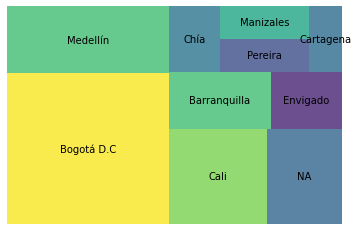

In [149]:
squarify.plot(sizes=top['target'], label=top.index, alpha=.8 )
plt.axis('off')
plt.show()

## TARGET by SURFACE

As expected, expensive properties are bigger! Despite big imputation, data makes sense with the real life. 

In [150]:
top = train_cleaned_imputed.groupby('target').agg({'surface_total':'mean'}).sort_values(by='surface_total', ascending=False).head(10)
top

,surface_total
target,
1,17535800.47
0,11163228.23


<AxesSubplot:xlabel='target'>

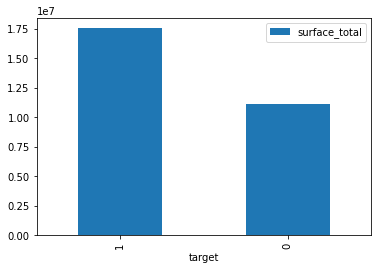

In [151]:
top.plot(kind='bar', figsize=(6,4))

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111372 entries, 0 to 111371
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   start_date      111372 non-null  datetime64[ns]
 1   lat             111372 non-null  float64       
 2   lon             111372 non-null  float64       
 3   l2              111372 non-null  object        
 4   l3              111372 non-null  object        
 5   surface_total   111372 non-null  float64       
 6   property_type   111372 non-null  object        
 7   target          111372 non-null  int64         
 8   pileta          111372 non-null  int64         
 9   vigilancia      111372 non-null  int64         
 10  patio           111372 non-null  int64         
 11  garage          111372 non-null  int64         
 12  balcon          111372 non-null  int64         
 13  cancha          111372 non-null  int64         
 14  gimnasio        111372 non-null  int

In [153]:
cat = ['target','property_type','pileta','vigilancia','patio','garage','balcon','cancha','gimnasio','sauna','a_estrenar']#,'bathrooms_cat','bedrooms_cat']

subset = train.drop(['l2','l3','start_date','lat','lon'], axis=1)

In [154]:
from tableone import TableOne, load_dataset
#https://tableone.readthedocs.io/en/latest/quickstart.html

mytable = TableOne(subset, dip_test=True, normal_test=True, tukey_test=True, categorical = cat)

mytable.tableone

Missing                    Overall
n                                                                     111372
surface_total, mean (SD)                        0  12759060.6 (1204862397.6)
property_type, n (%)      Apartamento           0               53677 (48.2)
                          Casa                                  35940 (32.3)
                          Finca                                   1080 (1.0)
                          Local comercial                         1190 (1.1)
                          Lote                                    9614 (8.6)
                          Oficina                                  939 (0.8)
                          Otro                                    8922 (8.0)
                          Parqueadero                               10 (0.0)
target, n (%)             0                     0               83482 (75.0)
                          1                                     27890 (25.0)
pileta, n (%)             0                     0               84662 (76.0)
                          1                                     26710 (24.0)
vigilancia, n (%)         0                     0               95823 (86.0)
                          1                                     15549 (14.0)
patio, n (%)              0                     0               42269 (38.0)
                          1                                     69103 (62.0)
garage, n (%)             0                     0               93868 (84.3)
                          1                                     17504 (15.7)
balcon, n (%)             0                     0               81892 (73.5)
                          1                                     29480 (26.5)
cancha, n (%)             0                     0               99196 (89.1)
                          1                                     12176 (10.9)
gimnasio, n (%)           0                     0               94120 (84.5)
                          1                                     17252 (15.5)
sauna, n (%)              0                     0              104343 (93.7)
                          1                                       7029 (6.3)
a_estrenar, n (%)         0                     0              106142 (95.3)
                          1                                       5230 (4.7)
days_published, mean (SD)                       0                59.8 (69.9)

In [155]:
mytable2 = TableOne(subset, groupby='target', pval=True, categorical = cat, rename={'target': 'Cheap or Expensive'})

mytable2.tableone

Grouped by Cheap or Expensive  \
                                                                Missing   
n                                                                         
surface_total, mean (SD)                                              0   
property_type, n (%)      Apartamento                                 0   
                          Casa                                            
                          Finca                                           
                          Local comercial                                 
                          Lote                                            
                          Oficina                                         
                          Otro                                            
                          Parqueadero                                     
Cheap or Expensive, n (%) 0                                           0   
                          1                                               
pileta, n (%)             0                                           0   
                          1                                               
vigilancia, n (%)         0                                           0   
                          1                                               
patio, n (%)              0                                           0   
                          1                                               
garage, n (%)             0                                           0   
                          1                                               
balcon, n (%)             0                                           0   
                          1                                               
cancha, n (%)             0                                           0   
                          1                                               
gimnasio, n (%)           0                                           0   
                          1                                               
sauna, n (%)              0                                           0   
                          1                                               
a_estrenar, n (%)         0                                           0   
                          1                                               
days_published, mean (SD)                                             0   

                                                                      \
                                                             Overall   
n                                                             111372   
surface_total, mean (SD)                   12759060.6 (1204862397.6)   
property_type, n (%)      Apartamento                   53677 (48.2)   
                          Casa                          35940 (32.3)   
                          Finca                           1080 (1.0)   
                          Local comercial                 1190 (1.1)   
                          Lote                            9614 (8.6)   
                          Oficina                          939 (0.8)   
                          Otro                            8922 (8.0)   
                          Parqueadero                       10 (0.0)   
Cheap or Expensive, n (%) 0                             83482 (75.0)   
                          1                             27890 (25.0)   
pileta, n (%)             0                             84662 (76.0)   
                          1                             26710 (24.0)   
vigilancia, n (%)         0                             95823 (86.0)   
                          1                             15549 (14.0)   
patio, n (%)              0                             42269 (38.0)   
                          1                             69103 (62.0)   
garage, n (%)             0                             93868 (84.3)   
                          1                           

In [156]:
train_cleaned = pd.read_csv('./data/cleaned/train_cleaned_imputed.csv', index_col = 0)

In [157]:
train_cleaned

,start_date,lat,lon,l2,l3,surface_total,price,property_type,target,pileta,vigilancia,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar,days_published
0,2020-12-14,6.20,-75.57,Antioquia,Medellín,900.00,9000.00,Casa,1,1,0,1,0,1,1,1,0,0,58.57
1,2020-09-16,4.72,-74.07,Cundinamarca,Bogotá D.C,122.00,625.00,Apartamento,0,1,0,1,0,0,1,1,0,0,240.00
2,2020-08-19,4.71,-74.03,Cundinamarca,Bogotá D.C,12759060.54,420.00,Casa,0,0,0,0,0,1,1,0,0,0,1.00
3,2020-11-23,7.12,-73.12,Santander,Bucaramanga,271.00,1310.00,Otro,1,0,0,0,0,0,0,0,0,0,7.00
4,2020-10-06,6.25,-75.57,Antioquia,Medellín,12759060.52,210.00,Apartamento,0,1,1,1,0,1,0,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111367,2020-11-26,6.34,-75.55,Antioquia,Bello,60.00,155.00,Apartamento,0,0,0,1,0,0,0,0,0,1,58.55
111368,2020-12-02,4.83,-75.76,Risaralda,NaN,12759060.58,740.00,Finca,1,1,0,1,0,0,0,0,0,0,49.00
111369,2020-10-15,4.81,-75.66,Risaralda,Pereira,65.00,135.00,Casa,0,0,0,0,0,1,0,0,0,0,0.00
111370,2020-11-30,7.06,-73.11,Santander,Floridablanca,12759060.53,345.00,Apartamento,0,0,0,1,0,0,0,0,0,0,170.00


In [158]:
train_cleaned.columns.tolist()

['start_date',
 'lat',
 'lon',
 'l2',
 'l3',
 'surface_total',
 'price',
 'property_type',
 'target',
 'pileta',
 'vigilancia',
 'patio',
 'garage',
 'balcon',
 'cancha',
 'gimnasio',
 'sauna',
 'a_estrenar',
 'days_published']

In [159]:
train_cleaned.drop('price', axis = 1, inplace = True)

In [160]:
train_cleaned

,start_date,lat,lon,l2,l3,surface_total,property_type,target,pileta,vigilancia,patio,garage,balcon,cancha,gimnasio,sauna,a_estrenar,days_published
0,2020-12-14,6.20,-75.57,Antioquia,Medellín,900.00,Casa,1,1,0,1,0,1,1,1,0,0,58.57
1,2020-09-16,4.72,-74.07,Cundinamarca,Bogotá D.C,122.00,Apartamento,0,1,0,1,0,0,1,1,0,0,240.00
2,2020-08-19,4.71,-74.03,Cundinamarca,Bogotá D.C,12759060.54,Casa,0,0,0,0,0,1,1,0,0,0,1.00
3,2020-11-23,7.12,-73.12,Santander,Bucaramanga,271.00,Otro,1,0,0,0,0,0,0,0,0,0,7.00
4,2020-10-06,6.25,-75.57,Antioquia,Medellín,12759060.52,Apartamento,0,1,1,1,0,1,0,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111367,2020-11-26,6.34,-75.55,Antioquia,Bello,60.00,Apartamento,0,0,0,1,0,0,0,0,0,1,58.55
111368,2020-12-02,4.83,-75.76,Risaralda,NaN,12759060.58,Finca,1,1,0,1,0,0,0,0,0,0,49.00
111369,2020-10-15,4.81,-75.66,Risaralda,Pereira,65.00,Casa,0,0,0,0,0,1,0,0,0,0,0.00
111370,2020-11-30,7.06,-73.11,Santander,Floridablanca,12759060.53,Apartamento,0,0,0,1,0,0,0,0,0,0,170.00


In [161]:
train_cleaned.to_csv('./data/cleaned/train_cleaned_imputated.csv', index = True)

# CONTINUE IN NOTEBOOK 2

In [162]:
import seaborn as sns

#sns.pairplot(train_cleaned, hue='target')